<a href="https://colab.research.google.com/github/zahra-sharifzadeh/pytorch/blob/main/03_PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

## 0. Copmuter vision library
* `torchvision`
* `torchvision.datasets`: get datasets
* `torchvision.models`: get pretrained models
* `torchvision.transforms`: function for manipulating your vision data
* `torch.utils.data.Dataset` : Base dataset class for PyTorch
* `torch.utils.data.DataLoader`: Creates a python iterable over a datasets


In [1]:
# import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# import matplot
import matplotlib.pyplot as plt

# Check Versions
print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


##1. Getting a dataset
Fashion MNIST

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",# where to download the datasets
    train=True,# do we want the taining datasets
    download=True, # do we want to download the datasets
    transform=ToTensor(), # transform data to tensor
    target_transform=None #  transform the labels
)

test_data = datasets.FashionMNIST(
    root="data",# where to download the datasets
    train=False,# do we want the taining datasets
    download=True, # do we want to download the datasets
    transform=torchvision.transforms.ToTensor(), # transform data to tensor
    target_transform=None #  transform the labels
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [5]:
# See the training data
img , label = train_data[0]
img , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
# Check the shape
print(f"Shape of image: {img.shape}")
print("label:", label)

Shape of image: torch.Size([1, 28, 28])
label: 9


### 1.2 Visualizing our data

image shape: torch.Size([28, 28, 1])


<ipython-input-11-09b4f8976646>:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3277.)
  print(f"image shape: {image.T.shape}")


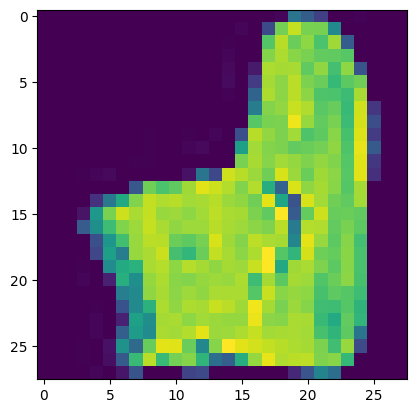

In [11]:
image, label = train_data[0]
print(f"image shape: {image.T.shape}")
plt.imshow(image.T)

image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

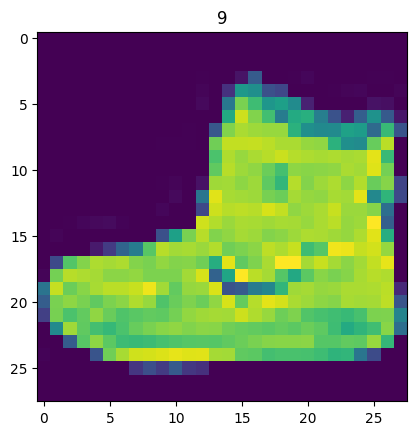

In [12]:
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

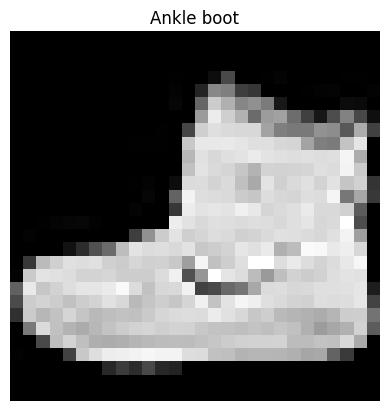

In [13]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

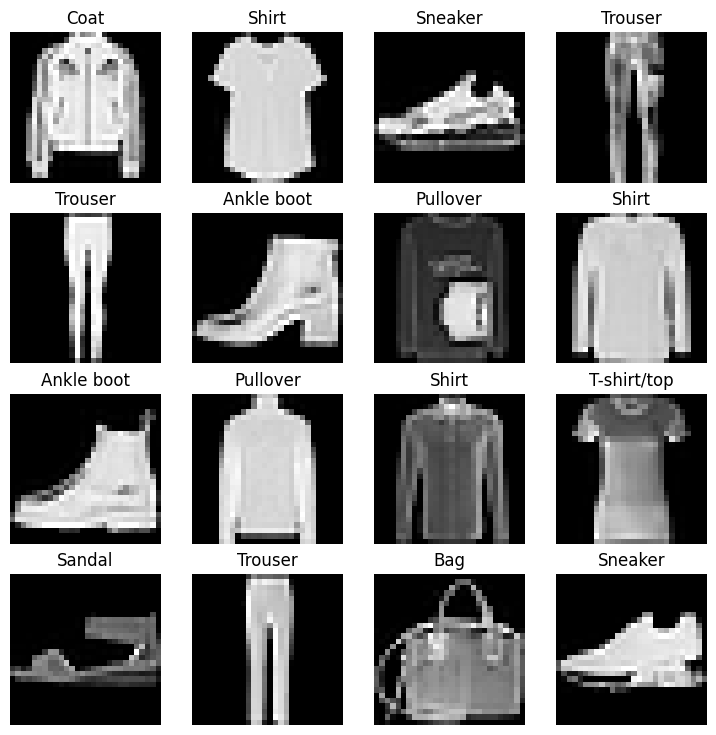

In [14]:
# Plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


## 2. Prepare DataLoader
* DataLoader: turn our dataset in to a python iterable 
* turn our data to batches or mini batches

In [15]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter

BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False) 
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ff9a0533f10>,
 <torch.utils.data.dataloader.DataLoader at 0x7ff9a0533820>)

In [16]:
# Let's check out what we've created
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataLoader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataLoader: {len(test_dataloader)} batches of {BATCH_SIZE}...")


DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7ff9a0533f10>, <torch.utils.data.dataloader.DataLoader object at 0x7ff9a0533820>)
Length of train_dataLoader: 1875 batches of 32...
Length of test_dataLoader: 313 batches of 32...


In [17]:
# Check out what 's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader)) 
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [18]:
len(train_features_batch)

32

Image size: torch.Size([1, 28, 28])
Label: 7 and Label size: torch.Size([])


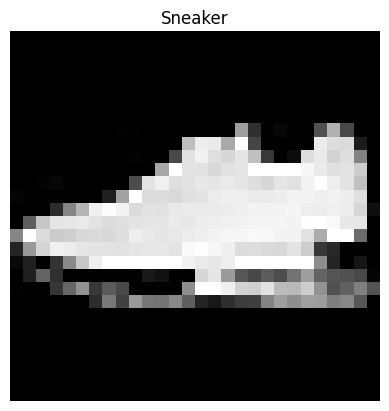

In [19]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label} and Label size: {label.shape}")

## 3. Model_0: Build a basline model 

In [20]:
# Creat a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

#Flatten the sample
output = flatten_model(x) # Froward pass

# print out what happened
print(f"Before flatten: {x.shape}")
print(f"After flatten: {output.shape}")
print(f"28 * 28 *1 = {28 * 28}")
output.squeeze() # vector space

Before flatten: torch.Size([1, 28, 28])
After flatten: torch.Size([1, 784])
28 * 28 *1 = 784


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.4235, 0.9451, 0.8275, 0.8784, 0.8824, 0.9020, 0.9098, 0.9608,
        0.9412, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.6549, 0.9569, 0.8902, 0.9059, 0.9020, 0.7608, 0.6196,
        0.5765, 1.0000, 0.0588, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.7255, 0.9294, 0.8824, 0.8000, 0.9176, 0.7529,
        0.7569, 0.3725, 0.8549, 0.2275, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.9137, 0.9216, 0.9255, 0.6275, 0.8784,
        0.7725, 0.9059, 0.5255, 0.7725, 0.4588, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

In [21]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(
      self,
      input_shape: int,
      hidden_units: int,
      output_shape: int):
    super().__init__()

    self.layer_stach = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, 
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape) 
        )
  
  def forward(self, x):
    return  self.layer_stach(x)


In [22]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28 * 28
    hidden_units=10, # units in hidden layer
    output_shape=len(class_names) # one for every class
)

model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stach): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [23]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [24]:
model_0.state_dict()

OrderedDict([('layer_stach.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stach.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stach.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.2 Setup loss, optimizer and evaluation metrics

In [25]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [26]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a function to time our experiments

In [27]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device= None):
  """ Prints difference between start and end time."""
  total_time = end - start 
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [28]:
start_time = timer()

end_time = timer()

print_train_time(start = start_time,
                     end = end_time,
                     device= "cpu")

Train time on cpu: 0.000 seconds


6.024999998999192e-05

### 3.3 Creating a training loop and a model on batches of data

In [29]:
# import tqdm to show progress bar
from tqdm.auto import tqdm

# set the seed and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set epoch ( keep small )

epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  
  ###Training 
  train_loss = 0
  train_acc = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # Forward pass 
    y_pred = model_0(X)

    # Calvulate 
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # optimize zero grad
    optimizer.zero_grad()

    # back propagation
    loss.backward()

    # optimizer step
    optimizer.step()

    # print out what's happening
    if batch % 400 == 0:
      print(f"Look at {batch * len(X)}/{len(train_dataloader.dataset)} sampeles.")


  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)


  ### Testing
  test_loss, test_acc = 0, 0

  model_0.eval()

  with torch.inference_mode():

    for X_test, y_test in test_dataloader:

      test_pred = model_0(X_test)

      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
  
  
  print(f"Train Loss:{train_loss:.4f}% | Train acc:{train_acc:.2f}% | Test loss:{test_loss:.4f}% | Test acc:{test_acc:.2f}% ")

train_time_end_on_cpu = timer()
print()
total_train_time_model_0 = print_train_time(
    train_time_start_on_cpu,
    train_time_end_on_cpu,
    device= str(next(model_0.parameters()).device)
)




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Look at 0/60000 sampeles.
Look at 12800/60000 sampeles.
Look at 25600/60000 sampeles.
Look at 38400/60000 sampeles.
Look at 51200/60000 sampeles.
Train Loss:0.5904% | Train acc:79.17% | Test loss:0.5095% | Test acc:82.04% 
Epoch: 1
-------
Look at 0/60000 sampeles.
Look at 12800/60000 sampeles.
Look at 25600/60000 sampeles.
Look at 38400/60000 sampeles.
Look at 51200/60000 sampeles.
Train Loss:0.4763% | Train acc:83.32% | Test loss:0.4799% | Test acc:83.20% 
Epoch: 2
-------
Look at 0/60000 sampeles.
Look at 12800/60000 sampeles.
Look at 25600/60000 sampeles.
Look at 38400/60000 sampeles.
Look at 51200/60000 sampeles.
Train Loss:0.4550% | Train acc:84.05% | Test loss:0.4766% | Test acc:83.43% 

Train time on cpu: 43.768 seconds


In [31]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 4. Make predicition and get Model 0 results

In [32]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Return a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0 
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      # Forward pass
      y_pred = model(X)

      #Accumulate loss and acc per batch
      loss += loss_fn(y_pred, y)
      acc  += accuracy_fn(y, 
                         y_pred.argmax(dim=1))
      
    #end loop

    #Scale loss and acc to find the avg of them
    
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
#end of function

# Calculate model 0 results on test datasets

model_0_results = eval_model(model=model_0,
                              data_loader=test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [33]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [34]:
torch.cuda.is_available()

False

## 5. Model 1 building a better model with non linearaty

In [35]:
class FashionMNISTModelV1(nn.Module):
  def __init__(
      self,
      input_shape: int,
      hidden_units: int,
      output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, 
                  out_features=hidden_units),
        nn.ReLU(),
        
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        # nn.ReLU()
        )
  
  def forward(self, x):
    return  self.layer_stack(x)

In [36]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(784,10,len(class_names)).to(device)
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [37]:
next(model_1.parameters()).device

device(type='cpu')

### 5.1 loss function and optimizer

In [38]:
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

### 5.2 functionizing training and test loop
* `train_step()`
* `test_step()`

In [39]:
def train_step(model: torch.nn.Module,
               data_loader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               accuracy_fn,
               device: torch.device = device):
  """
  perform a training model trying to learn on data_loader.
  """

  ###Training 
  model.to(device)
  model.train()

  train_loss = 0
  train_acc = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    # Forward pass 
    y_pred = model(X)

    # Calculate loss and accuracy 
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

    # optimize zero grad
    optimizer.zero_grad()

    # back propagation
    loss.backward()

    # optimizer step
    optimizer.step()

    # # print out what's happening
    # if batch % 400 == 0:
    #   print(f"Look at {batch * len(X)}/{len(data_loader.dataset)} sampeles.")


  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train Loss:{train_loss:.5f}% | Train acc:{train_acc:.2f}%\n")

In [40]:
def test_step(
    model : torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device: torch.device = device):
    ### Testing
  test_loss, test_acc = 0, 0
  model.to(device)

  model.eval()


  

  with torch.inference_mode():

    for X_test, y_test in data_loader:
      X_test, y_test = X_test.to(device), y_test.to(device)

      test_pred = model(X_test)

      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
  
    print(f"Test loss:{test_loss:.5f}% | Test acc:{test_acc:.2f}%\n ")




In [41]:
torch.manual_seed(42)

# Measure time
train_time_start_on_gpu = timer()

#set up epoch

epochs =3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}......")

  train_step(model_1,
               data_loader=train_dataloader,
               loss_fn = loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device= device)
  test_step(model_1,
               data_loader=test_dataloader,
               loss_fn = loss_fn,
               accuracy_fn=accuracy_fn,
               device= device)
  
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0......
Train Loss:0.64607% | Train acc:77.17%

Test loss:0.53855% | Test acc:80.76%
 
Epoch:1......
Train Loss:0.48094% | Train acc:82.94%

Test loss:0.49390% | Test acc:82.46%
 
Epoch:2......
Train Loss:0.44689% | Train acc:84.16%

Test loss:0.45746% | Test acc:83.99%
 
Train time on cpu: 36.801 seconds


In [45]:
model_1_results = eval_model(model_1,
               data_loader=test_dataloader,
               loss_fn = loss_fn,
               accuracy_fn=accuracy_fn,
               device = device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.45746350288391113,
 'model_acc': 83.98562300319489}

In [43]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [44]:
total_train_time_model_0

43.76756338099999

##6. Model 2 : Building a Convolution Neursl Network
* CNN
* Convnet

In [53]:
from torch.nn.modules.pooling import MaxPool2d
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, #(3,3),
                  stride=1,
                  padding=1),# setting up conv layer hyperparameter
        nn.ReLU(),

        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1),
        
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1),
        nn.ReLU(),

        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 0, out_features=output_shape)
    )

  def forward(self, x):
     z = self.conv_block_1(x)
     print(z.shape)
     z = self.conv_block_2(z)
     print(z.shape)
     z = self.classifier(z)
     print(z.shape)
     return z 
  



In [54]:
image.shape

torch.Size([1, 28, 28])

In [55]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units =10,
    output_shape = len(class_names)
).to(device)

model_2

/usr/local/lib/python3.9/dist-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=0, out_features=10, bias=True)
  )
)

### 6.1 Stepping through nn.Conv2d()

In [58]:
torch.manual_seed(42)

# Create a batch o images

images =  torch.randn(size=(32, 3, 64, 64))

test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")

print(test_image)

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.026

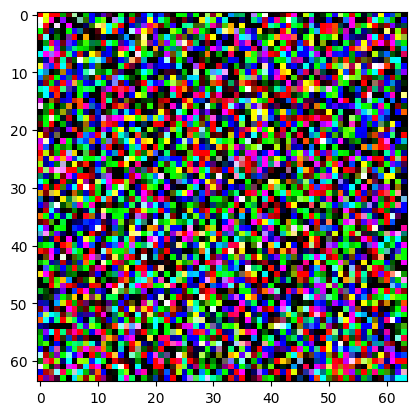

In [59]:
plt.imshow(test_image.T)

In [98]:
# Create a single con2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)
conv_layer

Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [99]:
# Pass the data through the convolutional layer
conv_out_put = conv_layer(test_image)
conv_out_put.shape

torch.Size([10, 64, 64])

In [100]:
# plt.imshow(conv_out_put.detach().numpy().T)

In [101]:
# Pass the data through the convolutional layer
conv_out_put2 = conv_layer(test_image.unsqueeze(dim=0))
conv_out_put2.shape

torch.Size([1, 10, 64, 64])

### 6.2 Stepping through `nn.MaxPool2d()`

In [102]:
test_image.shape

torch.Size([3, 64, 64])

In [103]:
# print out original image shape without unsqueezed dimention
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueeze dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPool2 layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer 
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueeze dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 32, 32])
